# Data Preprocessing

In [92]:
# import necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [93]:
# load data into a dataframe
data = pd.read_json("original_data.json")

### Drop Nulls & Replace Nulls With Mean

In [94]:
# print null values
nulls = data.isnull().sum().sort_values(ascending=False)
print(nulls.head(5))

description     5054
longitude        377
latitude         377
address            0
product_tree       0
dtype: int64


In [95]:
# drop description column (due to many null values, text has little relevance to numerical analysis)
data.drop(columns=['description'], axis=1, inplace=True)

nulls = data.isnull().sum().sort_values(ascending=False)
print(nulls.head(5))

longitude      377
latitude       377
address          0
room             0
poster_type      0
dtype: int64


In [96]:
# replace NoneType with NaN, then replace NaN with mean of the respective column
data['latitude'].fillna(np.nan)
data['latitude'].fillna(data['latitude'].mean(), inplace=True)
data['longitude'].fillna(data['longitude'].mean(), inplace=True)
nulls = data.isnull().sum().sort_values(ascending=False)
print(nulls.head(5))

address        0
room           0
poster_type    0
longitude      0
latitude       0
dtype: int64


### Dropping Duplicate Data

In [97]:
# drop data with duplicate id, time, and view
print(f"{data[data.drop(columns=['id','time','views']).duplicated()].shape[0]} of {data.shape[0]} datapoints are from duplicated postings")

duplicates = data[data.drop(columns=['id','time','views']).duplicated(keep=False)]
duplicates[['id', 'time', 'views']].sort_values(by=['id'], ascending=True)
# duplicates.sort_values(duplicates.address, ascending=False)

39 of 41663 datapoints are from duplicated postings


,id,time,views
41561,: 10192988,4 Sep 09:09,210
41644,: 10197091,4 Sep 09:09,177
40192,: 10206209,4 Sep 09:09,294
41638,: 10206213,4 Sep 09:09,209
41552,: 10210577,4 Sep 09:09,212
...,...,...,...
2308,: 10718791,Yesterday 16:20,14
2413,: 10718956,Yesterday 16:58,17
222,: 10720752,Today 14:48,0
251,: 10720842,Today 15:04,0


In [98]:
# drop data with duplicate address, floor, space
duplicates = data[data.drop(columns=['address','floor','space']).duplicated(keep=False)]
duplicates[['id','address','floor','space']].sort_values(by=['id'], ascending=True)

,id,address,floor,space


### Dropping Data With Houses Outside Of Target Area (Tbilisi)

In [99]:
# clean address feature (by dropping all non-Tbilisi houses)
print(f"{data[data.address.str.contains('Tbilisi')].shape[0]} of {data.shape[0]} entries are within Tbilisi")
data[data.address.str.contains('Tbilisi')]

36822 of 41663 entries are within Tbilisi


,address,product_tree,time,views,title,id,price_gel,price_usd,space,room,bedroom,floor,amenities,latitude,longitude,poster_type,poster_id
0,"შარტავას ქუჩა, Saburtalo, Saburtalo District, ...","Newly finished apartment for sale,Tbilisi,Sabu...",Today 12:33,622,Newly finished apartment for sale,: 10541934,"107,100","32,500",Area: 28.00 m²,1 Room,Bedroom,11/11,"Newly renovated,Nonstandard,Ceiling height,3.0...",41.724521,44.753788,Agent,2165179
2,"Queen Ketevan Avenue, Isani, Isani District, T...","Newly finished apartment for sale,Tbilisi,Isan...",Today 13:27,1226,Newly finished apartment for sale,: 10491378,"257,000","78,000",Area: 72.00 m²,3 Room,Bedroom,15/16,"Newly renovated,Nonstandard,Bedroom 1,Veranda ...",41.689502,44.820050,Owner,3533391
3,"კრწანისის ქუჩა, Ortatchala Street, Ortachala, ...","Newly finished apartment for sale,Tbilisi,Krts...",Today 13:33,3309,Newly finished apartment for sale,: 10255954,"157,200","47,700",Area: 53.00 m²,2 Room,Bedroom,2/4,"White frame,Nonstandard,Ceiling height,3.10 M,...",41.677084,44.817222,Owner,2083738
4,"ორთაჭალის ქ, Ortachala, Krtsanisi District, Tb...","Newly finished apartment for sale,Tbilisi,Krts...",Today 13:32,1484,Newly finished apartment for sale,: 10462781,"237,200","72,000",Area: 80.00 m²,3 Room,Bedroom,3/4,"White frame,Nonstandard,Ceiling height,3.00 M,...",41.682883,44.823815,Owner,2083738
5,"ნუცუბიძის ქ,ვაჟას კვარტლები, Saburtalo Distric...","Older finished apartment for sale,Tbilisi,Sabu...",Today 13:27,8048,Older finished apartment for sale,: 9289522,"158,200","48,000",Area: 60.00 m²,2 Room,Bedroom,14/16,"Newly renovated,Nonstandard,Bedroom 1,Bathroom...",41.768762,44.724123,Owner,3381712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41658,"Surrounding area of metro Grmaghele, Nadzalade...","Apartment under construction for sale,Tbilisi,...",4 Sep 09:09,172,Apartment under construction for sale,: 10194871,"179,200","54,400",Area: 75.00 m²,2 Room,Bedroom,11/22,"მწვანე კარკასი,Nonstandard,Ceiling height,3.10...",41.761308,44.789730,Construction,3506709
41659,"ნაძალადევი, Tbilisi","Newly finished apartment for sale,Tbilisi,2 rooms",4 Sep 09:09,217,Newly finished apartment for sale,: 10182927,"126,600","38,400",Area: 53.00 m²,2 Room,Bedroom,8/12,"მწვანე კარკასი,Nonstandard,Ceiling height,3.00...",41.731884,44.836876,Construction,3506709
41660,"ნაძალადევი, Tbilisi","Newly finished apartment for sale,Tbilisi,1 rooms",4 Sep 09:09,298,Newly finished apartment for sale,: 10182818,"62,400","18,900",Area: 25.75 m²,1 Room,Bedroom,7/12,"მწვანე კარკასი,Nonstandard,Ceiling height,3.00...",41.731884,44.836876,Construction,3506709
41661,"ნაძალადევი, Tbilisi","Newly finished apartment for sale,Tbilisi,3 rooms",4 Sep 09:09,216,Newly finished apartment for sale,: 10182585,"167,200","50,800",Area: 70.00 m²,3 Room,Bedroom,4/12,"მწვანე კარკასი,Nonstandard,Ceiling height,3.00...",41.731884,44.836876,Construction,3506709


In [100]:
# parse district/city data from product tree and combine with address
prodt_address = data.product_tree.str.split(r'\s*,\s*').apply(lambda r:r[1:-1])
address = prodt_address
data.address = address
data.head()

,address,product_tree,time,views,title,id,price_gel,price_usd,space,room,bedroom,floor,amenities,latitude,longitude,poster_type,poster_id
0,"[Tbilisi, Saburtalo District, Saburtalo]","Newly finished apartment for sale,Tbilisi,Sabu...",Today 12:33,622,Newly finished apartment for sale,: 10541934,"107,100","32,500",Area: 28.00 m²,1 Room,Bedroom,11/11,"Newly renovated,Nonstandard,Ceiling height,3.0...",41.724521,44.753788,Agent,2165179
1,"[Lower Kartli, Rustavi]","Older finished apartment for sale,Lower Kartli...",Today 11:40,276,Older finished apartment for sale,: 10680693,"87,300","26,500",Area: 63.00 m²,3 Room,Bedroom,5/9,"Newly renovated,Moskow,Ceiling height,2.70 M,B...",41.543090,45.011280,Agent,3594609
2,"[Tbilisi, Isani District, Isani, Queen Ketevan...","Newly finished apartment for sale,Tbilisi,Isan...",Today 13:27,1226,Newly finished apartment for sale,: 10491378,"257,000","78,000",Area: 72.00 m²,3 Room,Bedroom,15/16,"Newly renovated,Nonstandard,Bedroom 1,Veranda ...",41.689502,44.820050,Owner,3533391
3,"[Tbilisi, Krtsanisi District, Ortachala, Ortat...","Newly finished apartment for sale,Tbilisi,Krts...",Today 13:33,3309,Newly finished apartment for sale,: 10255954,"157,200","47,700",Area: 53.00 m²,2 Room,Bedroom,2/4,"White frame,Nonstandard,Ceiling height,3.10 M,...",41.677084,44.817222,Owner,2083738
4,"[Tbilisi, Krtsanisi District, Ortachala]","Newly finished apartment for sale,Tbilisi,Krts...",Today 13:32,1484,Newly finished apartment for sale,: 10462781,"237,200","72,000",Area: 80.00 m²,3 Room,Bedroom,3/4,"White frame,Nonstandard,Ceiling height,3.00 M,...",41.682883,44.823815,Owner,2083738


### Dropping Redudant Price Columns

In [101]:
price_gel = data['price_gel'].str.replace(',','').apply(int)
price_usd = data['price_usd'].str.replace(',','').apply(int)
# print(f"The std of GEL/USD is {(price_gel/price_usd).std():.4f}")

data = data.drop(columns=['price_gel'])
data.rename(columns=dict(price_usd='price'), inplace=True)
data.price = price_usd

### Removing Anomaly Prices

In [102]:
data = data[data.price <= data.price.quantile(.98)]
print(data.price.describe())

count     40829.000000
mean      78494.056920
std       53024.808112
min        1000.000000
25%       42500.000000
50%       62000.000000
75%       96000.000000
max      313000.000000
Name: price, dtype: float64


### Extracting Rooms

In [103]:
rooms = data.room.str.extract(r'(\d+)')[0].apply(int)
prodt_rooms = data.product_tree.str.split(',').apply(lambda r:r[-1][:-1]).str.extract(r'(\d+)')[0].apply(int)

data.room = rooms
data = data.drop(columns=['product_tree'])

### Extracting Space

In [104]:
space = data.space.str.extract(r'(\d+\.\d+)')[0].astype(float)
data.space = space

### Dropping Space vs. Price Outliers

Text(0.5, 1.0, 'Logarithmic relationship between room space and room price')

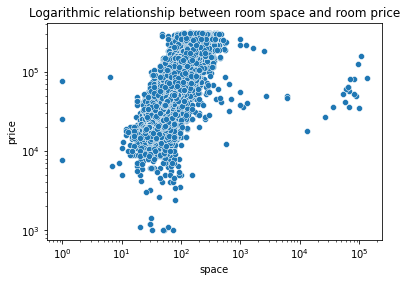

In [105]:
space = data['space']
price = data['price']
sns.scatterplot(x='space', y='price', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Logarithmic relationship between room space and room price')

Text(0.5, 1.0, 'Logarithmic relationship between room space and room price')

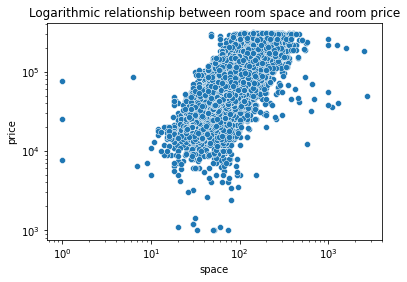

In [106]:
space_price_outliers = data[(np.log10(data.space) > 3.5) & (np.log10(data.price) < 6.1)]
data = data.drop(index=space_price_outliers.index)
sns.scatterplot(x='space', y='price', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Logarithmic relationship between room space and room price')

### Clean Up Space vs. Room "Outlier" Data

In [107]:
data = data[data.space/data.room > 12]
data = data[data.space/data.room < 70]

### Extracting Amenities

In [108]:
amenities = data.amenities.str.split(',')
renovation_type = amenities.apply(lambda r:r[0])
renovation_type.value_counts()

Newly renovated     27280
Old renovation       5005
White frame          3198
Black frame          2047
მწვანე კარკასი       1496
Not renovated         931
Under renovation      558
Name: amenities, dtype: int64

In [109]:
arch_type = amenities.apply(lambda r:r[1])
arch_type.value_counts()

Nonstandard      33518
City              3191
Czech             1172
Khrushchov         696
Moskow             594
Kavlashvili        493
Italian Court      334
Tuxareli           247
Lvov               230
Metromsheni         26
                    14
Name: amenities, dtype: int64

In [110]:
bedrooms = data.amenities.str.extract(r'Bedroom (\d+)')[0].apply(int)
bedrooms.isna().sum()

0

In [111]:
data.bedroom = bedrooms
data.bedroom.describe()

count    40515.000000
mean         1.801160
std          1.645827
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        127.000000
Name: bedroom, dtype: float64

In [112]:
# remove max bedroom anomaly data
data = data[data.bedroom <= data.bedroom.quantile(.99)]

In [113]:
furniture = amenities.apply(lambda r: 'Furniture' in r).astype('uint8')
furniture.value_counts()

0    22110
1    18405
Name: amenities, dtype: int64

In [114]:
data['furniture'] = furniture

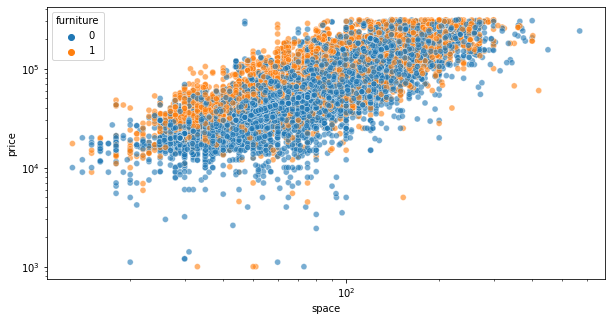

In [115]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='space', y='price', hue='furniture', 
                data=data, alpha=.6)
plt.xscale('log')
plt.yscale('log')

In [116]:
final_data = data[['price', 'space', 'room', 'bedroom','furniture', 'latitude', 'longitude']]
final_data.to_csv("preprocessed_data.csv", index=False)